In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import missingno as msno

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
path_figures = Path('../../figures/')

miiv_path = '~/Documents/data/ts/synthetic_2/fully_observed/synthetic_2_ts_eav.csv.gz'
# miiv_path_p = '~/Documents/data/ts/miiv/fully_observed/miiv_ts_wide.parquet'
df = pd.read_csv(miiv_path)
df_wide = pd.pivot_table(df, index=["id", "time"], columns="variable", values="value").reset_index(level=[0, 1])
# df = pd.read_parquet(miiv_path_p)
# df['time'] = df['time'].apply(lambda x: x.total_seconds() / 60 / 60)
print(df_wide.shape)
df_wide.head()

(100000, 7)


variable,id,time,X0_ts,X1_ts,X2_ts,X3_ts,Y_ts
0,0,0,-0.504205,0.713320,0.543657,0.006903,0.0
1,0,1,-1.078681,0.547127,0.839031,-0.176253,0.0
2,0,2,0.446764,-0.208496,0.550235,-0.832454,0.0
3,0,3,1.347463,0.181738,0.630574,0.063319,0.0
4,0,4,0.027169,0.674259,-0.109590,-0.059911,0.0


---
# Mean and Std Dev

In [7]:
df_wide.mean()

variable
id       999.500000
time      24.500000
X0_ts     -0.003799
X1_ts     -0.000392
X2_ts      0.001221
X3_ts      0.000226
Y_ts       0.326460
dtype: float64

In [8]:
df_wide.std()

variable
id       577.353084
time      14.430942
X0_ts      0.997833
X1_ts      0.905109
X2_ts      0.823487
X3_ts      0.739904
Y_ts       0.468920
dtype: float64

---
# Plot a sample

In [20]:
sample = df_wide.loc[df_wide['id'] == 1]
time = sample['time']
sample = sample.drop(columns=['id', 'time'])
sample.shape

(50, 5)

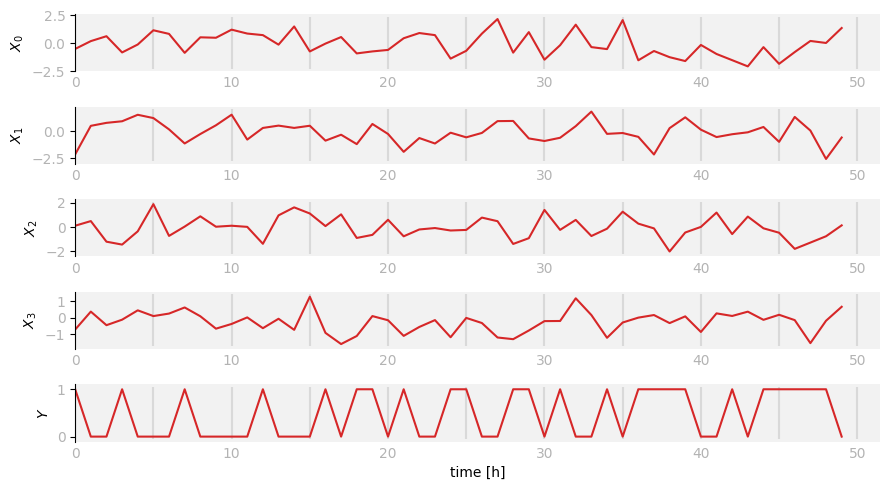

In [38]:
dims = sample.shape[-1]
fig = plt.figure(figsize=(9, 1*dims))

for feature in range(dims):
    ax = fig.add_subplot(dims,1,feature+1)
 
    # 1) plot prediction
    plt.plot(time, sample.iloc[:, feature], alpha=1, label='predicted', c='C3')
        
    ax.set_xticks(np.arange(0,1.1,0.1) * 50, minor=True, alpha=0)
    # ax.set_yticks(sorted(list(ax.get_yticks()) + [min, max]))
    # ax.set_yticks([min, max], minor=True)
    label_name = f'$X_{feature}$'
    if feature == (dims-1):
        label_name = f'$Y$'
    ax.set(ylabel=label_name, xlim=(0,None)) #, ylim=(min, max))
    ax.tick_params(axis='x', which='both', colors='#b3b3b3', length=0)
    ax.tick_params(axis='y', colors='black')
    ax.spines['left'].set_color('black')
    plt.setp(ax.get_yticklabels(), color="#b3b3b3")
    ax.vlines(np.arange(0,1.1,0.1)*50, ax.get_ylim()[0], ax.get_ylim()[1], color='#d9d9d9', zorder=0)
    ax.set_facecolor('#f2f2f2')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax.set(xlabel='time [h]')

plt.tight_layout()
plt.savefig(path_figures / 'synthetic_2_ts.pdf', bbox_inches='tight')
# fig.subplots_adjust(top=0.975)